In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

## Part 1: Load the Data Set

In [3]:
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


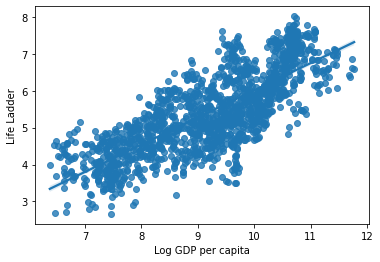

In [4]:
# Happiness and LogGDP in the WHR data are generally well correlated
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df);

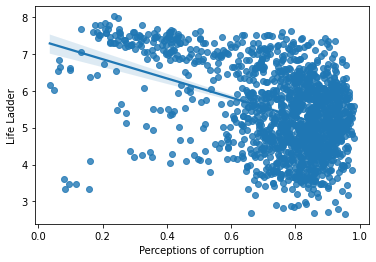

In [5]:
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df);

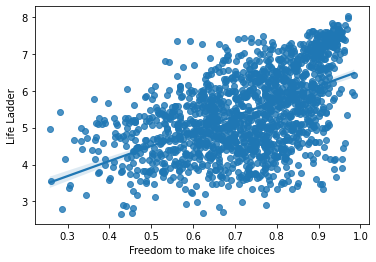

In [6]:
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df);

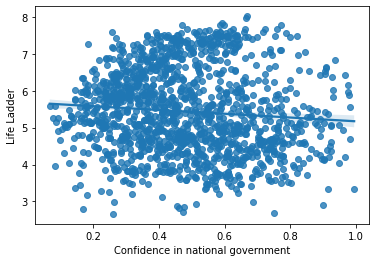

In [7]:
sns.regplot(x='Confidence in national government', y='Life Ladder', data=df);

## Part 2: Exploratory Data Analysis

In [8]:
df.shape

(1562, 19)

In [11]:
# Missing values in each column 
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [12]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')
['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


In [13]:
# replace all missing values with average
for col in nan_cols:
    mean = df[col].mean()
    df[col].fillna(value=mean, inplace=True)  
    
# check
print(df.isnull().sum())

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

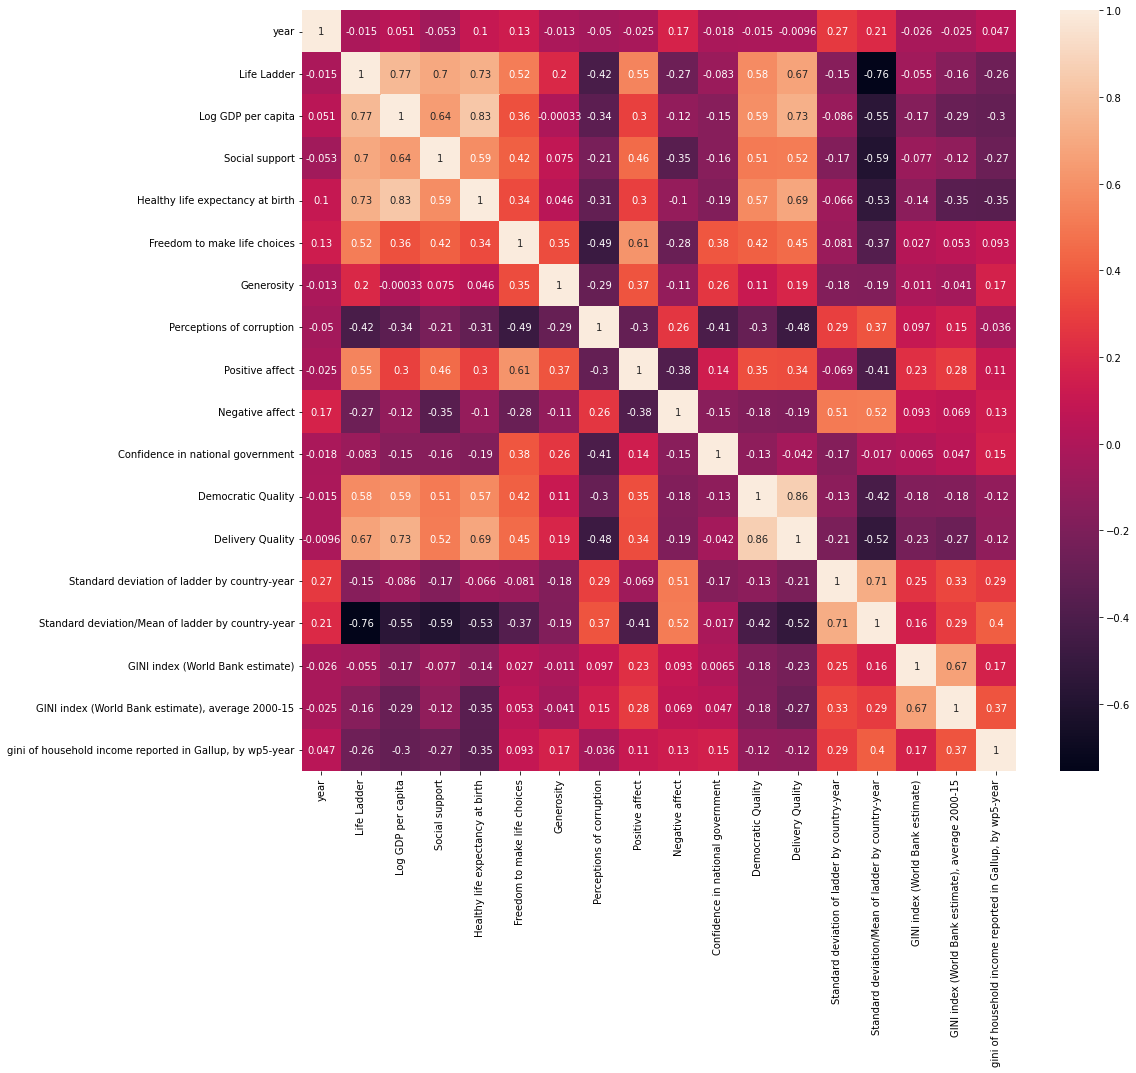

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Best correlations: 
GDP, Life Expectancy at Birth, Social support, Delivery Quality, Democratic Quality, positive affect, freedom to make life choices 
### Worst correlations: 
Standard deviation/Mean of ladder by country year, perceptions of corruption, gini of household income, 

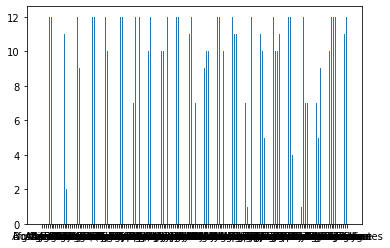

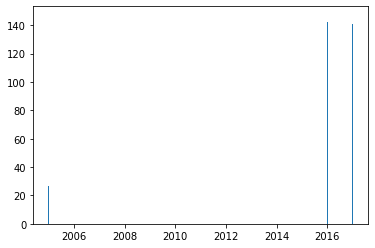

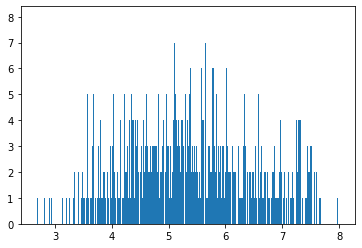

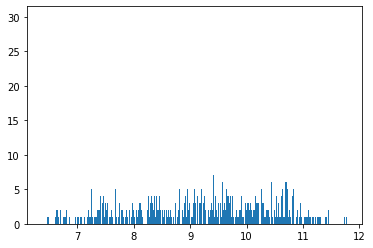

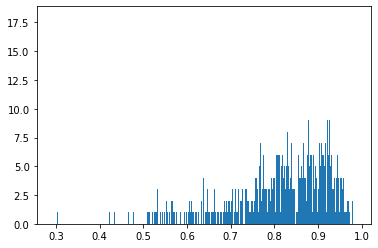

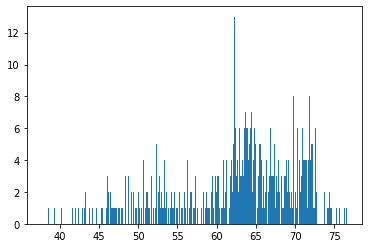

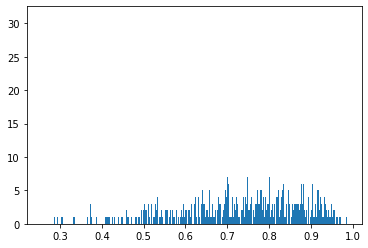

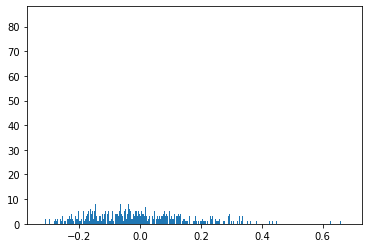

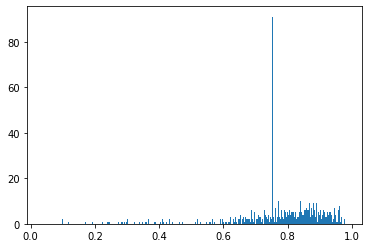

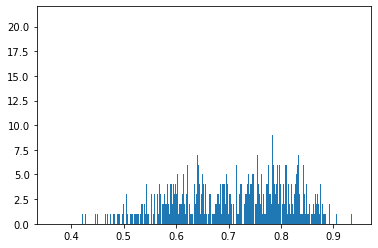

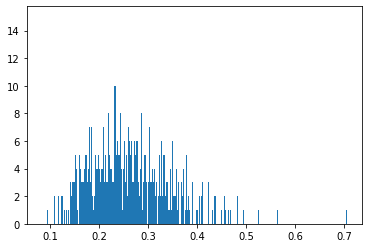

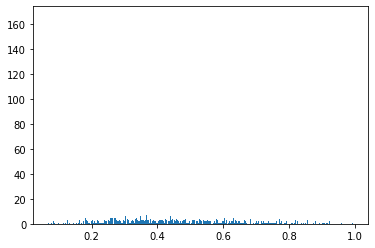

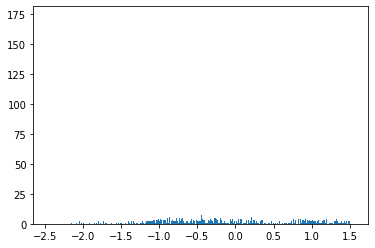

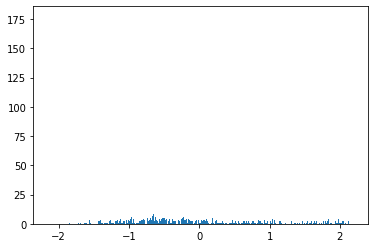

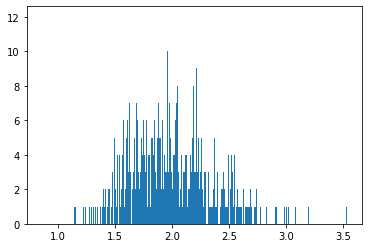

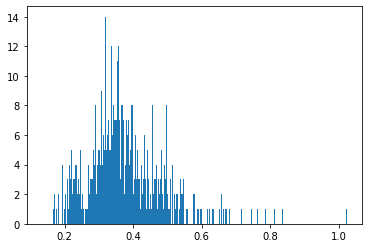

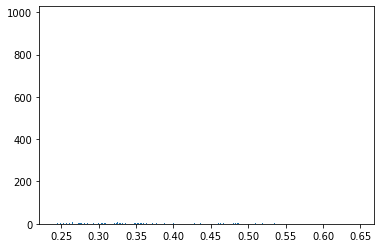

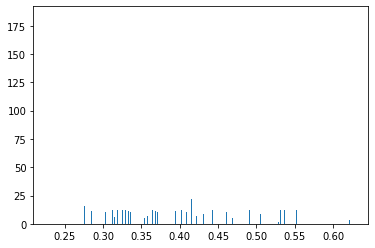

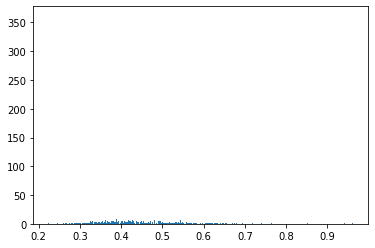

In [39]:
for col in df.columns:
    plt.hist(df[col], bins=1000)
    plt.show()

In [15]:
# Detect outliers
cols = df.columns.values # all columns

for col in cols:
    winsorized_col = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    df[col + '-win'] = winsorized_col
    
df.head(15)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Positive affect-win,Negative affect-win,Confidence in national government-win,Democratic Quality-win,Delivery Quality-win,Standard deviation of ladder by country-year-win,Standard deviation/Mean of ladder by country-year-win,GINI index (World Bank estimate)-win,"GINI index (World Bank estimate), average 2000-15-win","gini of household income reported in Gallup, by wp5-year-win"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,...,0.517637,0.258195,0.612072,-1.929690,-1.642179,1.774662,0.476600,0.372846,0.386948,0.445204
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,...,0.583926,0.237092,0.611545,-2.017452,-1.635025,1.722688,0.391362,0.372846,0.386948,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,...,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.372846,0.386948,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,...,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.372846,0.386948,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,...,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.372846,0.386948,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,...,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.283989,0.342569,0.372846,0.386948,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,...,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,0.372846,0.386948,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,...,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,0.372846,0.386948,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,...,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,0.372846,0.386948,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,...,0.496349,0.371326,0.261179,-0.126617,0.004947,1.454051,0.546283,0.372846,0.386948,0.286599


In [16]:
# Check 
(df['Positive affect'] - df['Positive affect-win']).unique()
print(len(df['Positive affect']))
print(len(df['Positive affect-win']))

1562
1562


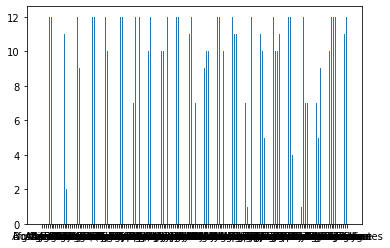

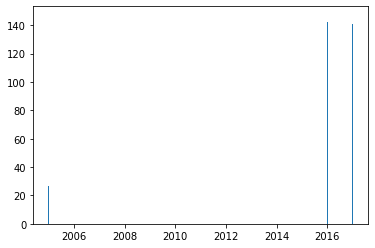

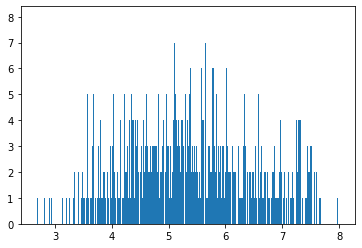

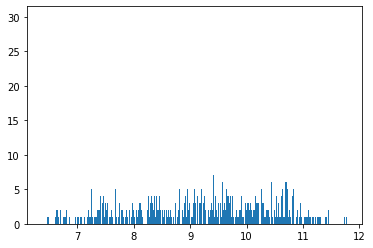

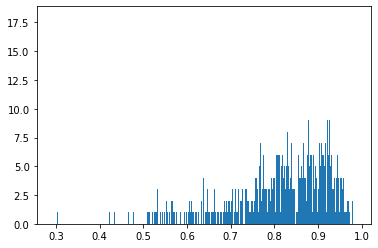

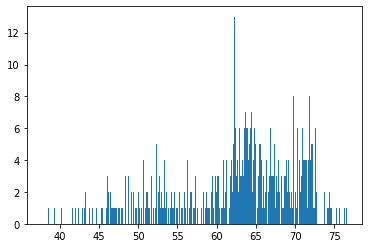

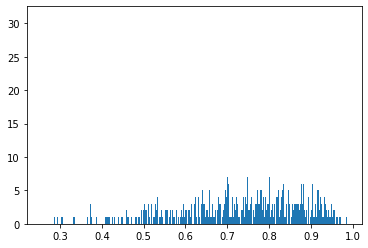

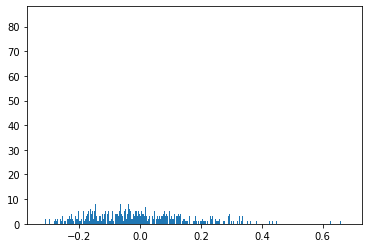

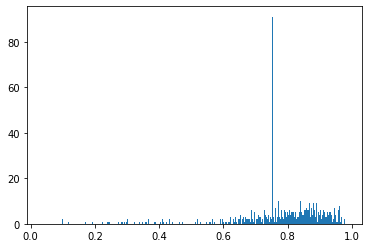

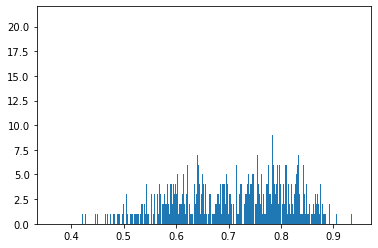

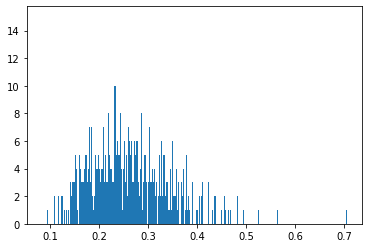

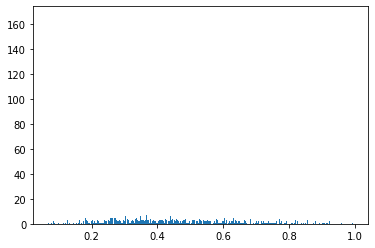

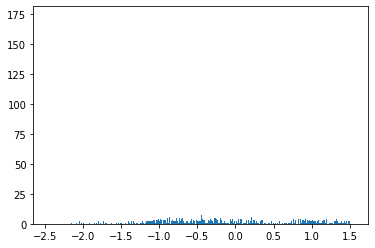

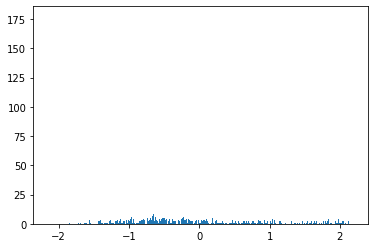

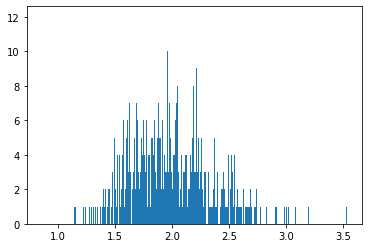

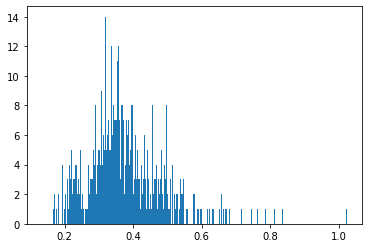

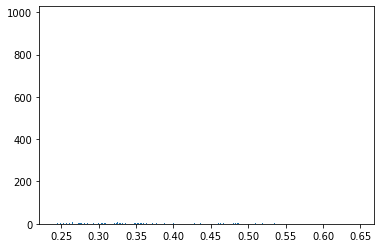

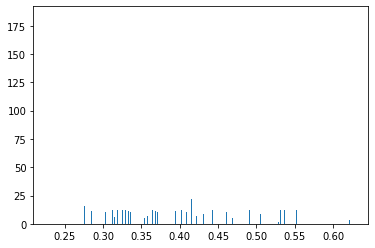

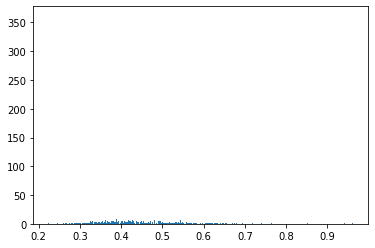

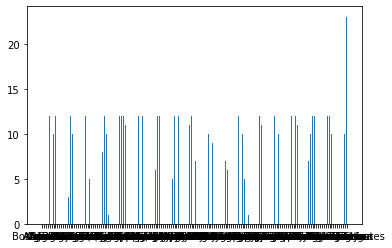

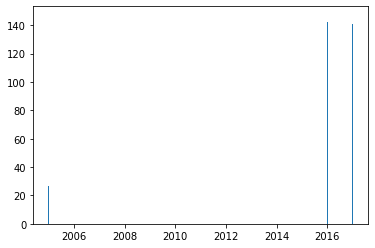

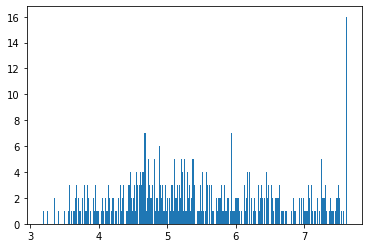

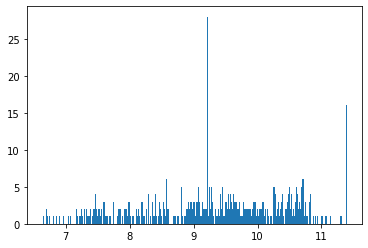

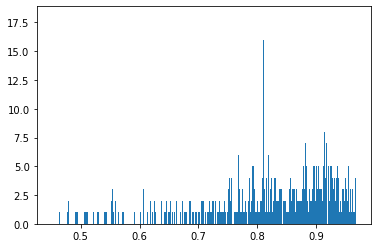

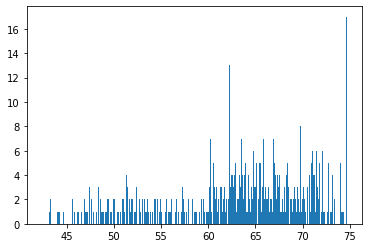

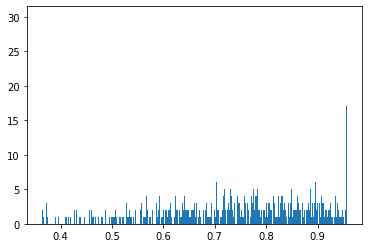

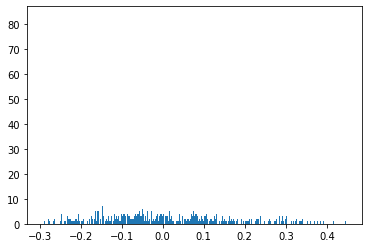

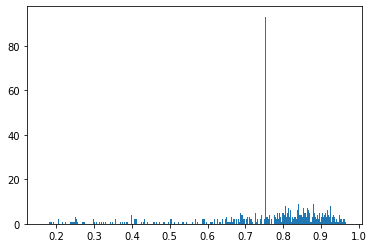

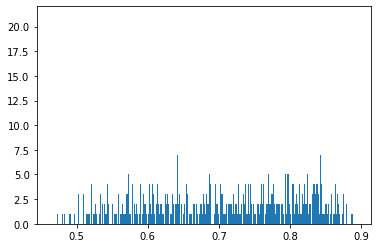

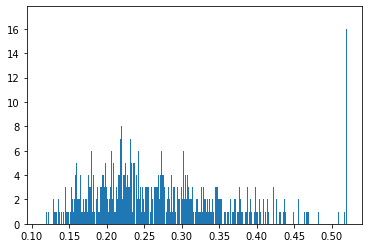

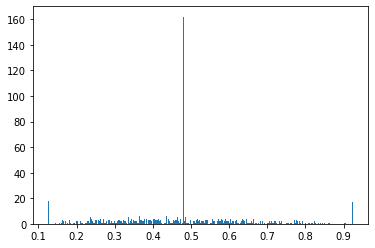

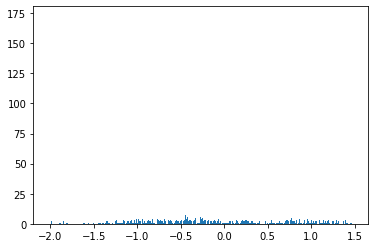

In [ ]:
for col in df.columns:
    plt.hist(df[col], bins=1000)
    plt.show()

## Part 3: Implement Project Plan

In [17]:
cols_to_drop = ['Negative affect',  
                'Standard deviation/Mean of ladder by country-year', 
                'GINI index (World Bank estimate), average 2000-15', 'year', 'Generosity']

df = df.drop(cols_to_drop, axis=1)
df.head()

,country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Confidence in national government,Democratic Quality,...,Positive affect-win,Negative affect-win,Confidence in national government-win,Democratic Quality-win,Delivery Quality-win,Standard deviation of ladder by country-year-win,Standard deviation/Mean of ladder by country-year-win,GINI index (World Bank estimate)-win,"GINI index (World Bank estimate), average 2000-15-win","gini of household income reported in Gallup, by wp5-year-win"
0,Afghanistan,3.723590,7.168690,0.450662,49.209663,0.718114,0.881686,0.517637,0.612072,-1.929690,...,0.517637,0.258195,0.612072,-1.929690,-1.642179,1.774662,0.476600,0.372846,0.386948,0.445204
1,Afghanistan,4.401778,7.333790,0.552308,49.624432,0.678896,0.850035,0.583926,0.611545,-2.044093,...,0.583926,0.237092,0.611545,-2.017452,-1.635025,1.722688,0.391362,0.372846,0.386948,0.441906
2,Afghanistan,4.758381,7.386629,0.539075,50.008961,0.600127,0.706766,0.618265,0.299357,-1.991810,...,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.372846,0.386948,0.327318
3,Afghanistan,3.831719,7.415019,0.521104,50.367298,0.495901,0.731109,0.611387,0.307386,-1.919018,...,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.372846,0.386948,0.336764
4,Afghanistan,3.782938,7.517126,0.520637,50.709263,0.530935,0.775620,0.710385,0.435440,-1.842996,...,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.372846,0.386948,0.344540


In [18]:
X = df['Log GDP per capita'].to_frame()
y = df['Life Ladder']

print(X)
print(y)


      Log GDP per capita
0               7.168690
1               7.333790
2               7.386629
3               7.415019
4               7.517126
...                  ...
1557            7.565154
1558            7.562753
1559            7.556052
1560            7.538829
1561            7.538187

[1562 rows x 1 columns]
0       3.723590
1       4.401778
2       4.758381
3       3.831719
4       3.782938
          ...   
1557    4.690188
1558    4.184451
1559    3.703191
1560    3.735400
1561    3.638300
Name: Life Ladder, Length: 1562, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [20]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [21]:
# mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.71
 R^2 =   0.61


####  Performance based on life ladder and freedom to make life choices:

RMSE =   0.96
R^2 =   0.28

####  Performance based on life ladder and gdp:
RMSE =   0.72
 R^2 =   0.59
 
#### After changing test size from .15 to .30 -- Slight Improvement:
RMSE =   0.71
R^2 =   0.61

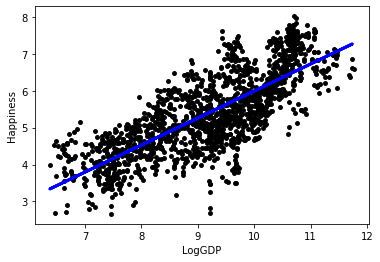

In [22]:
plt.scatter(X, y,  color='black',s=15);

plt.plot(X_test, prediction, color='blue', linewidth=3);

plt.xlabel('LogGDP');
plt.ylabel('Happiness');


In [23]:
features = ['Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality', 
            'Positive affect', 'Democratic Quality', 'Freedom to make life choices']

X = df[features]
y = df['Life Ladder']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [25]:
# Create the LinearRegression model object 
model_xtra_features = LinearRegression()

# Fit the model to the training data 
model_xtra_features.fit(X_train, y_train)

# Make predictions on the test data 
prediction2 = model_xtra_features.predict(X_test)

In [26]:
# Model parameters 
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , model_xtra_features.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in model_xtra_features.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -2.6511101179486634

Weights:
w_ 1 =  0.30141163704492036  [ weight of  Log GDP per capita ]
w_ 2 =  0.024898821087547054  [ weight of  Healthy life expectancy at birth ]
w_ 3 =  1.9742718213931747  [ weight of  Social support ]
w_ 4 =  0.18894194606805326  [ weight of  Delivery Quality ]
w_ 5 =  2.2151277341230946  [ weight of  Positive affect ]
w_ 6 =  -0.08053978268212669  [ weight of  Democratic Quality ]
w_ 7 =  0.7781862163976239  [ weight of  Freedom to make life choices ]


In [27]:
# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction2)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction2))


Model Performance

RMSE =   0.56
 R^2 =   0.76


### Features:
'Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality'

'Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality', 
            'Democratic Quality'

### Model Performance: 
Same performance --
RMSE =   0.62
 R^2 =   0.70
 
### Best Performance:
Features: 
'Log GDP per capita', 'Healthy life expectancy at birth', 'Social support', 'Delivery Quality', 'Positive affect',
'Democratic Quality', 'Freedom to make life choices'


RMSE =   0.56
R^2 =   0.76

In [28]:
# GradientBoostingRegressor model object
model_gbr = GradientBoostingRegressor(random_state=1234)

# Fit the model to the training data
model_gbr.fit(X_train, y_train)

# Make predictions on the test data
prediction_gbr = model_gbr.predict(X_test)

# (RMSE) and R-squared (R^2) for the Gradient Boosting model
rmse_gbr = mean_squared_error(y_test, prediction_gbr, squared=False)
r2_gbr = r2_score(y_test, prediction_gbr)

print("Gradient Boosting Model Performance:")
print('RMSE =   %.2f'
      % rmse_gbr)
print('R^2 =   %.2f' % r2_gbr)

Gradient Boosting Model Performance:
RMSE =   0.44
R^2 =   0.85


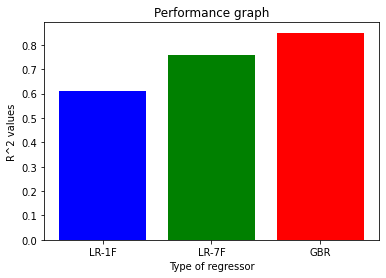

In [30]:
x = ['LR-1F', 'LR-7F', 'GBR']
y = [0.61, 0.76, 0.85] 

plt.figure()
plt.bar(x, y, color= ['blue', 'green', 'red'])
plt.title("Performance graph")
plt.xlabel("Type of regressor")
plt.ylabel("R^2 values")
plt.show()

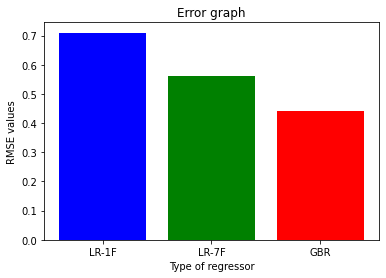

In [31]:
x = ['LR-1F', 'LR-7F', 'GBR']
y = [0.71, 0.56, 0.44] 

plt.figure()
plt.bar(x, y, color= ['blue', 'green', 'red'])
plt.title("Error graph")
plt.xlabel("Type of regressor")
plt.ylabel("RMSE values")
plt.show()

#### Conclusion:

The gradient boosting algorithm led to the best prediction based on a model with 7 features. 
These feautres were selected based on the correlation matrix against the life ladder column. 